In [1]:
import pandas as pd
import numpy as np

In [2]:
#read data
df = pd.read_csv("pandas/03_Exercise_NOAA_QCLCD_2011_hourly_13904", index_col= 0)
df.head()


,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


## Cleaning and tidying datetime data

In [3]:
#set time Index

# Convert the date column to string: df_dropped['date']
df['date'] = df['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df['Time'] = df['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df['date'] + df["Time"]

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format ='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df.set_index(date_times)

# Print the output of df_clean.head()
df_clean.head()



,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [4]:
df_clean.info() # no missing value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10337 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(2), object(15)
memory usage: 1.4+ MB


In [5]:
'''
If ‘raise’, then invalid parsing will raise an exception
If ‘coerce’, then invalid parsing will be set as NaN
If ‘ignore’, then invalid parsing will return the input

The numeric columns contain missing values labeled as 'M'.
In this exercise, your job is to transform these columns such that
they contain only numeric values and interpret missing data as NaN.
'''


# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-6-20 10:00:00', "dry_bulb_faren"])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors = "coerce")

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 10:00:00', "dry_bulb_faren"])

# # Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean["wind_speed"], errors= "coerce")
df_clean['dew_point_faren'] = pd.to_numeric(df_clean["dew_point_faren"], errors= "coerce")





2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
2011-06-20 09:08:00    84
2011-06-20 09:53:00    88
Name: dry_bulb_faren, dtype: object
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
2011-06-20 09:08:00    84.0
2011-06-20 09:53:00    88.0
Name: dry_bulb_faren, dtype: float64


In [6]:
#看一個slice
df_clean.loc["2011-06-20 08:29:00", :]

Wban                     13904
date                  20110620
Time                      0829
StationType                 12
sky_condition                M
visibility                null
dry_bulb_faren             NaN
dry_bulb_cel                 M
wet_bulb_faren               M
wet_bulb_cel                 M
dew_point_faren            NaN
dew_point_cel                M
relative_humidity            M
wind_speed                 NaN
wind_direction               M
station_pressure             M
sea_level_pressure           M
Name: 2011-06-20 08:29:00, dtype: object

In [7]:
#Statistical EDA
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10337 non-null object
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10318 non-null float64
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.7+ MB


In [8]:
# Print the median of the dry_bulb_faren column
print(df_clean.dry_bulb_faren.median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [9]:
#Pandas中的resample，重新採樣，是對原樣本重新處理的一個方法，
#是一個對常規時間序列數據重新採樣和頻率轉換的便捷的方法。


# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample("D").mean() ##D M Y

# # Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011["dry_bulb_faren"].values ## .values to drop format

daily_mean_2011.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,50.166667,20.500000,11.083333
2011-01-02,13904,12,39.416667,19.708333,4.166667
2011-01-03,13904,12,46.846154,35.500000,2.653846
2011-01-04,13904,12,53.367347,50.408163,2.510204
2011-01-05,13904,12,57.965517,40.068966,4.689655


In [10]:
# Downsample df_climate by day and aggregate by mean: daily_climate 
df_climate = pd.read_csv("pandas/weather_data_austin_2010.csv")

date = pd.to_datetime(df_climate["Date"], format ='%Y%m%d ')
df_climate = df_climate.set_index(date)
daily_climate = df_climate.resample("D").mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate["Temperature"].values
daily_temp_climate
# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())




daily_climate

1.33018318701


,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0
2010-01-06,49.679167,37.787500,1.0
2010-01-07,49.491667,37.487500,1.0
2010-01-08,49.366667,37.408333,1.0
2010-01-09,49.354167,37.583333,1.0


## find special info

In [11]:
'''
The DataFrame df_clean from previous exercises has been provided 
for you. The column 'sky_condition' provides information about 
whether the day was sunny ('CLR') or overcast ('OVC').
'''
# Select days that are sunny: sunny
sunny = df_clean[df_clean.sky_condition == "CLR"]

# Select days that are overcast: overcast
overcast = df_clean[df_clean.sky_condition.str.contains("OVC")]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample("D").max()
overcast_daily_max = overcast.resample("D").max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())


Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


#### Is there a correlation between temperature and windspeed? 
#### Let's find out.

                wind_speed  dry_bulb_faren
wind_speed        1.000000        0.197826
dry_bulb_faren    0.197826        1.000000


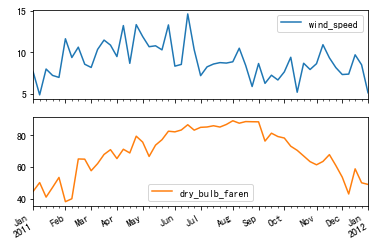

In [12]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean.loc[:,['wind_speed','dry_bulb_faren']].resample("W").mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()


## Daily hours of clear sky

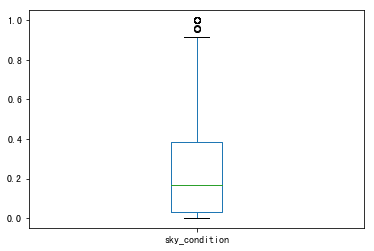

In [30]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean.sky_condition == "CLR"

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample("D").sum() ##sum by day

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample("D").count()
total_hours
# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind="box")
plt.show()


## Heat or humidity

#you will explore the maximum temperature and dew point of each month

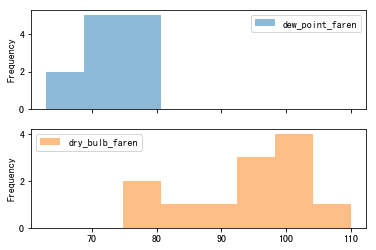

In [14]:


# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean.loc[:,['dew_point_faren',"dry_bulb_faren"]].resample("M").max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind = "hist",bins = 8, alpha = 0.5, subplots = True)

# Show the plot
plt.show()


### Probability of high temperatures


95.3


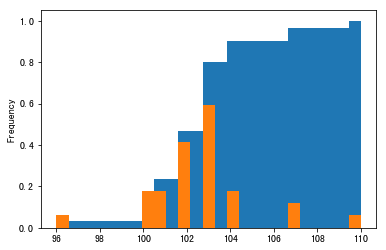

30


In [39]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc["2010-08","Temperature"].max()
print(august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-08', "dry_bulb_faren"].resample("D").max()

# Filter out days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011[august_2011> august_max]

# # Construct a CDF of august_2011_high
august_2011_high.plot(kind = "hist", bins = 25, cumulative = True, normed = True)
august_2011_high.plot(kind = "hist", bins = 25, normed = True)

# Display the plot

plt.show()
print(august_2011_high.count())